In [1]:
import tensorflow as tf
print("Version de tensorflow:{}".format(tf.__version__))
print("GPU:{}".format(tf.test.gpu_device_name()))

Version de tensorflow:2.1.0
GPU:


In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Videos1_2_3 (1).csv')
df.head()

,currentframe,N_Person,per_xmid,per_ymid,per_xmin,per_ymin,per_xmax,per_ymax,N_Handgun,hg_xmid,...,hg_xmin,hg_ymin,hg_xmax,hg_ymax,included_center,areai,areah,dist,Intersection,Ground_Truth
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,394.064373,176.115577,425.699604,203.980340,1,844.925198,881.508223,136.120892,Center_left,1
1,0,1,338.124817,308.649231,279.351261,157.656418,396.898373,459.642044,0,409.881988,...,394.064373,176.115577,425.699604,203.980340,0,78.968729,881.508223,138.619456,Up_right,0
2,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,393.607435,176.050999,425.668627,203.878841,1,848.952861,892.193796,136.317231,Center_left,1
3,1,1,338.274475,308.534027,279.539314,157.674393,397.009636,459.393662,0,409.638031,...,393.607435,176.050999,425.668627,203.878841,0,94.675906,892.193796,138.388548,Up_right,0
4,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,393.593826,175.932056,425.627609,203.722820,1,837.705837,890.243298,136.384041,Center_left,1


In [3]:
len(df)

12652

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12652 entries, 0 to 12651
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   currentframe     12652 non-null  int64  
 1   N_Person         12652 non-null  int64  
 2   per_xmid         12652 non-null  float64
 3   per_ymid         12652 non-null  float64
 4   per_xmin         12652 non-null  float64
 5   per_ymin         12652 non-null  float64
 6   per_xmax         12652 non-null  float64
 7   per_ymax         12652 non-null  float64
 8   N_Handgun        12652 non-null  int64  
 9   hg_xmid          12652 non-null  float64
 10  hg_ymid          12652 non-null  float64
 11  hg_xmin          12652 non-null  float64
 12  hg_ymin          12652 non-null  float64
 13  hg_xmax          12652 non-null  float64
 14  hg_ymax          12652 non-null  float64
 15  included_center  12652 non-null  int64  
 16  areai            12652 non-null  float64
 17  areah       

In [5]:
df.nunique()

currentframe        1689
N_Person               5
per_xmid            8978
per_ymid            8962
per_xmin            8983
per_ymin            8979
per_xmax            8982
per_ymax            8970
N_Handgun              5
hg_xmid             4329
hg_ymid             4327
hg_xmin             4331
hg_ymin             4331
hg_xmax             4331
hg_ymax             4330
included_center        2
areai               5511
areah               4331
dist               12652
Intersection           9
Ground_Truth           2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

0    8424
1    4228
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,currentframe,N_Person,per_xmid,per_ymid,per_xmin,per_ymin,per_xmax,per_ymax,N_Handgun,hg_xmid,...,Ground_Truth,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,1,1,0,0,0,0,0,0,0,0
1,0,1,338.124817,308.649231,279.351261,157.656418,396.898373,459.642044,0,409.881988,...,0,0,0,0,0,0,0,0,0,1
2,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,1,1,0,0,0,0,0,0,0,0
3,1,1,338.274475,308.534027,279.539314,157.674393,397.009636,459.393662,0,409.638031,...,0,0,0,0,0,0,0,0,0,1
4,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,1,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12652 entries, 0 to 12651
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   currentframe                  12652 non-null  int64  
 1   N_Person                      12652 non-null  int64  
 2   per_xmid                      12652 non-null  float64
 3   per_ymid                      12652 non-null  float64
 4   per_xmin                      12652 non-null  float64
 5   per_ymin                      12652 non-null  float64
 6   per_xmax                      12652 non-null  float64
 7   per_ymax                      12652 non-null  float64
 8   N_Handgun                     12652 non-null  int64  
 9   hg_xmid                       12652 non-null  float64
 10  hg_ymid                       12652 non-null  float64
 11  hg_xmin                       12652 non-null  float64
 12  hg_ymin                       12652 non-null  float64
 13  h

In [9]:
X = df2.drop('Ground_Truth',axis='columns')
y = df2.Ground_Truth

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12652 entries, 0 to 12651
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   currentframe                  12652 non-null  int64  
 1   N_Person                      12652 non-null  int64  
 2   per_xmid                      12652 non-null  float64
 3   per_ymid                      12652 non-null  float64
 4   per_xmin                      12652 non-null  float64
 5   per_ymin                      12652 non-null  float64
 6   per_xmax                      12652 non-null  float64
 7   per_ymax                      12652 non-null  float64
 8   N_Handgun                     12652 non-null  int64  
 9   hg_xmid                       12652 non-null  float64
 10  hg_ymid                       12652 non-null  float64
 11  hg_xmin                       12652 non-null  float64
 12  hg_ymin                       12652 non-null  float64
 13  h

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-2.0489514 , -1.11274597,  0.33989488, -2.1566782 ,  0.3701992 ,
        -1.65103893,  0.29602604, -3.20232235, -0.57607603,  0.56213314,
        -2.34052204,  0.61447809, -2.12081703,  0.50958857, -2.5573473 ,
         1.26811752, -0.06463069, -0.5915216 , -0.64579167,  2.32439971,
        -0.27056207, -0.02352825, -0.01257389, -0.43421103, -1.13193808,
        -0.1451333 , -0.07296436, -0.17186801],
       [-2.0489514 , -0.06038672, -0.29356253, -2.17562215, -0.16515593,
        -1.63665292, -0.40446314, -3.34777465, -0.57607603,  0.56213314,
        -2.34052204,  0.61447809, -2.12081703,  0.50958857, -2.5573473 ,
        -0.78857045, -0.46587968, -0.5915216 , -0.62883701, -0.4302186 ,
        -0.27056207, -0.02352825, -0.01257389, -0.43421103, -1.13193808,
        -0.1451333 , -0.07296436,  5.81841856],
       [-2.04669759, -1.11274597,  0.33961438, -2.15585409,  0.36920283,
        -1.6488704 ,  0.29644675, -3.20734341, -0.57607603,  0.56068317,
        -2.3416668 ,  0.6117

In [12]:
print(scaler.mean_)

[9.09106623e+02 1.05738223e+00 4.01556492e+02 4.15881999e+02
 3.15145035e+02 3.00285205e+02 4.87967948e+02 5.31478794e+02
 3.87211508e-01 3.15303209e+02 3.59825385e+02 2.92086914e+02
 3.39647453e+02 3.38519504e+02 3.80003317e+02 3.83417641e-01
 9.68300700e+02 2.15281262e+03 2.31289485e+02 1.56180841e-01
 6.82105596e-02 5.53272210e-04 1.58077774e-04 1.58631046e-01
 5.61650332e-01 2.06291495e-02 5.29560544e-03 2.86911160e-02]


In [13]:
print(scaler.scale_)

[4.43693600e+02 9.50245842e-01 2.16075512e+02 4.92883235e+01
 2.16727143e+02 8.71466305e+01 2.25161619e+02 2.14580602e+01
 6.72153476e-01 1.68249783e+02 7.25382729e+01 1.65957845e+02
 7.71079606e+01 1.71079386e+02 6.88302982e+01 4.86218627e-01
 1.90893059e+03 2.14921043e+03 1.47367328e+02 3.63026701e-01
 2.52106880e-01 2.35152312e-02 1.25719046e-02 3.65331682e-01
 4.96184680e-01 1.42139325e-01 7.25779719e-02 1.66936922e-01]


In [14]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [15]:
X_train.shape

(9489, 28)

In [16]:
y_train.value_counts()

0    6318
1    3171
Name: Ground_Truth, dtype: int64

In [17]:
3171/6318

0.5018993352326686

In [18]:
X_test.shape

(3163, 28)

In [19]:
y_test.value_counts()

0    2106
1    1057
Name: Ground_Truth, dtype: int64

In [20]:
1057/2106

0.5018993352326686

In [21]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=123, tol=0.000000001)
mlp.fit(X_train,y_train)
predictions_mlp=mlp.predict_proba(X_test)
predictions_mlp

array([[9.99997050e-01, 2.94954782e-06],
       [2.56194067e-05, 9.99974381e-01],
       [9.99999881e-01, 1.19406899e-07],
       ...,
       [1.00000000e+00, 1.34362395e-20],
       [1.05824315e-08, 9.99999989e-01],
       [9.99999724e-01, 2.75846796e-07]])

In [22]:
predictions_mlp=mlp.predict(X_test)
predictions_mlp

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2106
           1       0.99      0.98      0.99      1057

    accuracy                           0.99      3163
   macro avg       0.99      0.99      0.99      3163
weighted avg       0.99      0.99      0.99      3163



In [24]:
print("Score train = ",mlp.score(X_train, y_train))
print("Score test = ",mlp.score(X_test, y_test))

Score train =  0.996733059331858
Score test =  0.9901991779955738


In [58]:
# save the model to disk
filename = 'mlp1.sav'
pickle.dump(mlp, open(filename, 'wb'))

In [25]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(28,3,28,3,28), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=123, tol=0.000000001)
mlp.fit(X_train,y_train)
predictions_mlp=mlp.predict_proba(X_test)
predictions_mlp

array([[9.92391767e-01, 7.60823325e-03],
       [7.38312755e-04, 9.99261687e-01],
       [9.92391767e-01, 7.60823325e-03],
       ...,
       [9.92391767e-01, 7.60823325e-03],
       [4.69661348e-05, 9.99953034e-01],
       [9.92391767e-01, 7.60823325e-03]])

In [26]:
predictions_mlp=mlp.predict(X_test)
predictions_mlp

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2106
           1       0.98      0.98      0.98      1057

    accuracy                           0.99      3163
   macro avg       0.99      0.99      0.99      3163
weighted avg       0.99      0.99      0.99      3163



In [28]:
print("Score train = ",mlp.score(X_train, y_train))
print("Score test = ",mlp.score(X_test, y_test))

Score train =  0.9910422594583201
Score test =  0.9886184002529245


In [ ]:
# save the model to disk
filename = 'mlp2.sav'
pickle.dump(mlp, open(filename, 'wb'))

# Random Forest 

In [29]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df2, test_size=0.2, random_state=123)
X_train_rfc, y_train_rfc = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test_rfc, y_test_rfc = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train_rfc.shape, y_train_rfc.shape)
print(X_test_rfc.shape, y_test_rfc.shape)

(10121, 28) (10121,)
(2531, 28) (2531,)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rfc_o = RandomForestClassifier(n_estimators=10, max_depth=2)
scores = pd.DataFrame(cross_validate(rfc_o, X_train_rfc, y_train_rfc, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9100988887186962
mean_test =  0.9103839805844183


,fit_time,score_time,test_score,train_score
0,0.047871,0.003026,0.914116,0.907773
1,0.047841,0.003019,0.937747,0.924470
2,0.044878,0.001992,0.895257,0.907674
3,0.041891,0.001992,0.902174,0.909869
4,0.042856,0.002992,0.911067,0.908881
5,0.038896,0.001995,0.915020,0.909430
6,0.042886,0.001995,0.913043,0.907125
7,0.041888,0.002992,0.905138,0.907454
8,0.042917,0.002962,0.899209,0.908223
9,0.049898,0.002990,0.911067,0.910089


                         feature  importance       std
0                   currentframe    0.000000  0.000000
25        Intersection_Up_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
14                       hg_ymax    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
12                       hg_ymin    0.000000  0.000000
10                       hg_ymid    0.000000  0.000000
27         Intersection_Up_right    0.000000  0.000000
7                       per_ymax    0.000000  0.000000
6                       per_xmax    0.000000  0.000000
4                       per_xmin    0.000000  0.000000
1                       N_Person    0.000000  0.000000
3                       per_ymid    0.000000  0.000000
8                      N_Handgun    0.001120  0.003361
11                       hg_xmin    0.003350  0.010051
17                         areah    0.008922  0.026767
13        

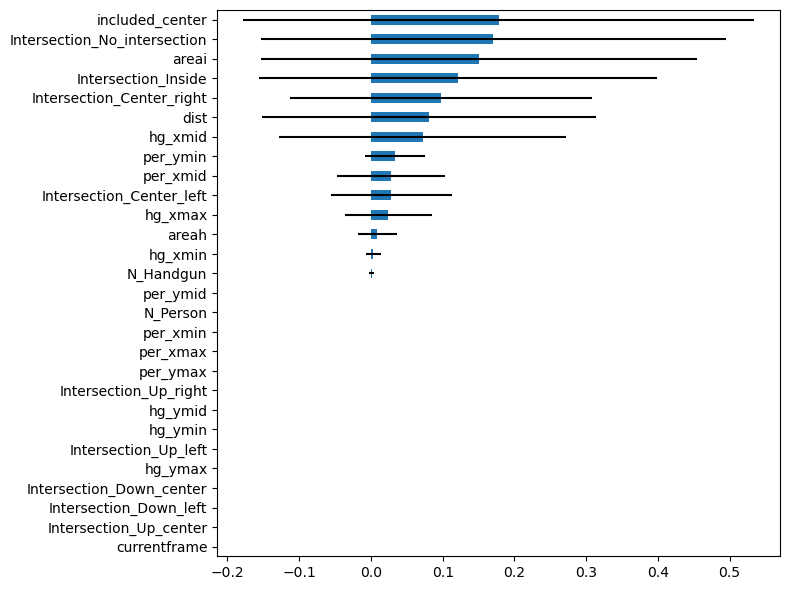

In [31]:
rfc_o.fit(X_train_rfc.values, y_train_rfc.values)
predictions_rfc_o=rfc_o.predict(X_test_rfc.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = rfc_o.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_o.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train_rfc.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [32]:
predictions_rfc_o=rfc_o.predict(X_test_rfc)
predictions_rfc_o

C:\ProgramData\Anaconda3\envs\entornoGPU\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test_rfc,predictions_rfc_o))

              precision    recall  f1-score   support

           0       0.98      0.89      0.94      1710
           1       0.81      0.97      0.88       821

    accuracy                           0.92      2531
   macro avg       0.90      0.93      0.91      2531
weighted avg       0.93      0.92      0.92      2531



In [22]:
# save the model to disk
filename = 'rfc1.sav'
pickle.dump(rfc_o, open(filename, 'wb'))

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rfc_o = RandomForestClassifier(n_estimators=10, max_depth=4)
scores = pd.DataFrame(cross_validate(rfc_o, X_train_rfc, y_train_rfc, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9442522821613976
mean_test =  0.9414089172769803


,fit_time,score_time,test_score,train_score
0,0.076825,0.002990,0.941757,0.940382
1,0.068816,0.002992,0.951581,0.952574
2,0.070810,0.002989,0.944664,0.954660
3,0.065794,0.002992,0.924901,0.928752
4,0.065851,0.002992,0.947628,0.950818
5,0.069813,0.001997,0.948617,0.943572
6,0.067849,0.002991,0.958498,0.954331
7,0.064828,0.002991,0.927866,0.938742
8,0.065826,0.002990,0.940711,0.943243
9,0.065818,0.002991,0.927866,0.935448


                         feature  importance       std
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
14                       hg_ymax    0.000214  0.000642
1                       N_Person    0.000308  0.000635
26          Intersection_Up_left    0.000880  0.001787
13                       hg_xmax    0.002348  0.004129
27         Intersection_Up_right    0.002560  0.007680
7                       per_ymax    0.002780  0.002956
25        Intersection_Up_center    0.002837  0.007272
10                       hg_ymid    0.003365  0.005850
9                        hg_xmid    0.005079  0.008813
5                       per_ymin    0.007651  0.010686
17                         areah    0.008365  0.014004
6                       per_xmax    0.008786  0.018190
12                       hg_ymin    0.009660  0.014011
3                       per_ymid    0.010331  0.014824
0         

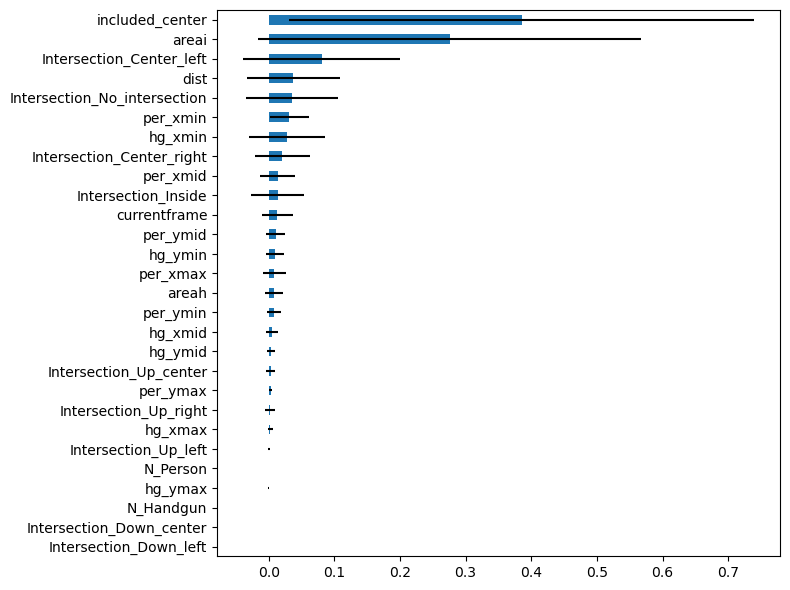

In [35]:
rfc_o.fit(X_train_rfc.values, y_train_rfc.values)
predictions_rfc_o=rfc_o.predict(X_test_rfc.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = rfc_o.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_o.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train_rfc.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [36]:
predictions_rfc_o=rfc_o.predict(X_test_rfc)
predictions_rfc_o

C:\ProgramData\Anaconda3\envs\entornoGPU\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test_rfc,predictions_rfc_o))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1710
           1       0.84      0.98      0.90       821

    accuracy                           0.93      2531
   macro avg       0.91      0.94      0.93      2531
weighted avg       0.94      0.93      0.93      2531



In [ ]:
# save the model to disk
filename = 'rfc2.sav'
pickle.dump(rfc_o, open(filename, 'wb'))